Must be run in Python 3

In [51]:
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import tensorflow as tf
import json
import csv
import matplotlib.pyplot as plt

In [4]:
vocab_size = 22000
vector_dim = 100

In [5]:
wiki_model = Word2Vec.load("english-wikipedia-articles-20170820-models/enwiki_2017_08_20_fasttext.model")
wvs = wiki_model.wv.vectors[:vocab_size]


Create embedding of first `vocab_size` words in embedding for accurate comparison 

In [7]:
def convert_np_to_bin_model(np_vectors,model_name):
    with open(model_name+'.txt', 'w') as we:
        we.write('{} {}\n'.format(vocab_size,vector_dim))
        for i in range(vocab_size):
            w = wiki_model.wv.index2word[i]
            vec = np_vectors[i]
            we.write('{} '.format(w))
            for v in vec:
                we.write(str(v) + ' ')
            we.write('\n')
    model = KeyedVectors.load_word2vec_format(model_name+'.txt', binary=False)
    model.save_word2vec_format(model_name+'.bin', binary=True)
    print('created model '+model_name+'.bin')

In [8]:
convert_np_to_bin_model(wvs,'fasttext_wiki_orig')

created model fasttext_wiki_orig.bin


In [15]:
! ../word-embeddings-benchmarks/scripts/evaluate_on_all.py -f fasttext_wiki_orig.bin -o fasttext_wiki_orig.csv


fasttext_wiki_orig.bin
01:39:45 INFO:loading projection weights from /Users/haileyjames/Documents/wasserstein-debiasing/fasttext_wiki_orig.bin
01:39:45 INFO:Loading #22000 words with 100 dim
01:39:45 INFO:Transformed 22000 into 22000 words
01:39:45 INFO:Calculating similarity benchmarks
01:39:45 WARNING:Missing 531 words. Will replace them with mean vector
01:39:45 INFO:Spearman correlation of scores on MEN 0.5983153481584027
01:39:45 WARNING:Missing 48 words. Will replace them with mean vector
01:39:45 INFO:Spearman correlation of scores on WS353 0.46266864889490805
01:39:45 WARNING:Missing 27 words. Will replace them with mean vector
01:39:45 INFO:Spearman correlation of scores on WS353R 0.4104594294511796
01:39:45 WARNING:Missing 27 words. Will replace them with mean vector
01:39:45 INFO:Spearman correlation of scores on WS353S 0.5393883796332126
01:39:45 WARNING:Missing 93 words. Will replace them with mean vector
01:39:45 INFO:Spearman correlation of scores on SimLex999 0.25481599

In [37]:
! ../word-embeddings-benchmarks/scripts/evaluate_on_all.py -f bolukbasi_debiased_vecs.bin -o bolukbasi_debiased_vecs.csv


bolukbasi_debiased_vecs.bin
01:56:05 INFO:loading projection weights from /Users/haileyjames/Documents/wasserstein-debiasing/bolukbasi_debiased_vecs.bin
01:56:05 INFO:Loading #22000 words with 100 dim
01:56:06 INFO:Transformed 22000 into 22000 words
01:56:06 INFO:Calculating similarity benchmarks
01:56:06 WARNING:Missing 531 words. Will replace them with mean vector
01:56:06 INFO:Spearman correlation of scores on MEN 0.605032513296761
01:56:06 WARNING:Missing 48 words. Will replace them with mean vector
01:56:06 INFO:Spearman correlation of scores on WS353 0.49365303911869446
01:56:06 WARNING:Missing 27 words. Will replace them with mean vector
01:56:06 INFO:Spearman correlation of scores on WS353R 0.43902921898168895
01:56:06 WARNING:Missing 27 words. Will replace them with mean vector
01:56:06 INFO:Spearman correlation of scores on WS353S 0.576071702841646
01:56:06 WARNING:Missing 93 words. Will replace them with mean vector
01:56:06 INFO:Spearman correlation of scores on SimLex999 0

In [38]:
! ../word-embeddings-benchmarks/scripts/evaluate_on_all.py -f fasttext_wiki_debias_prob.bin -o fasttext_wiki_debias_prob.csv


fasttext_wiki_debias_prob.bin
01:56:31 INFO:loading projection weights from /Users/haileyjames/Documents/wasserstein-debiasing/fasttext_wiki_debias_prob.bin
01:56:31 INFO:Loading #22000 words with 100 dim
01:56:32 INFO:Transformed 22000 into 22000 words
01:56:32 INFO:Calculating similarity benchmarks
01:56:32 WARNING:Missing 531 words. Will replace them with mean vector
01:56:32 INFO:Spearman correlation of scores on MEN 0.42617470496728654
01:56:32 WARNING:Missing 48 words. Will replace them with mean vector
01:56:32 INFO:Spearman correlation of scores on WS353 0.29895188685429447
01:56:32 WARNING:Missing 27 words. Will replace them with mean vector
01:56:32 INFO:Spearman correlation of scores on WS353R 0.18553621838838874
01:56:32 WARNING:Missing 27 words. Will replace them with mean vector
01:56:32 INFO:Spearman correlation of scores on WS353S 0.3535213557268825
01:56:32 WARNING:Missing 93 words. Will replace them with mean vector
01:56:32 INFO:Spearman correlation of scores on SimL

In [41]:
! ../word-embeddings-benchmarks/scripts/evaluate_on_all.py -f fasttext_wiki_debias_cluster.bin -o fasttext_wiki_debias_cluster.csv



fasttext_wiki_debias_cluster.bin
02:02:46 INFO:loading projection weights from /Users/haileyjames/Documents/wasserstein-debiasing/fasttext_wiki_debias_cluster.bin
02:02:46 INFO:Loading #22000 words with 100 dim
02:02:46 INFO:Transformed 22000 into 22000 words
02:02:46 INFO:Calculating similarity benchmarks
02:02:46 WARNING:Missing 531 words. Will replace them with mean vector
02:02:47 INFO:Spearman correlation of scores on MEN 0.5434090400970196
02:02:47 WARNING:Missing 48 words. Will replace them with mean vector
02:02:47 INFO:Spearman correlation of scores on WS353 0.4292529923622601
02:02:47 WARNING:Missing 27 words. Will replace them with mean vector
02:02:47 INFO:Spearman correlation of scores on WS353R 0.3627917459125532
02:02:47 WARNING:Missing 27 words. Will replace them with mean vector
02:02:47 INFO:Spearman correlation of scores on WS353S 0.51809121535187
02:02:47 WARNING:Missing 93 words. Will replace them with mean vector
02:02:47 INFO:Spearman correlation of scores on Sim

In [70]:
def csv_to_dict(csv_file):
    with open(csv_file, mode='r') as infile:
        reader = csv.reader(infile)
        for i in reader:
            if i[0] == '':
                tests = i
            else:
                vals = i
        return {t:float(v) for t,v in zip(tests,vals)}
    

In [71]:
orig_results = csv_to_dict('fasttext_wiki_orig.csv')


In [72]:
bolukbasi_results = csv_to_dict('bolukbasi_debiased_vecs.csv')


In [73]:
debias_prob_results = csv_to_dict('fasttext_wiki_debias_prob.csv')


In [74]:
debias_cluster_results = csv_to_dict('fasttext_wiki_debias_cluster.csv')



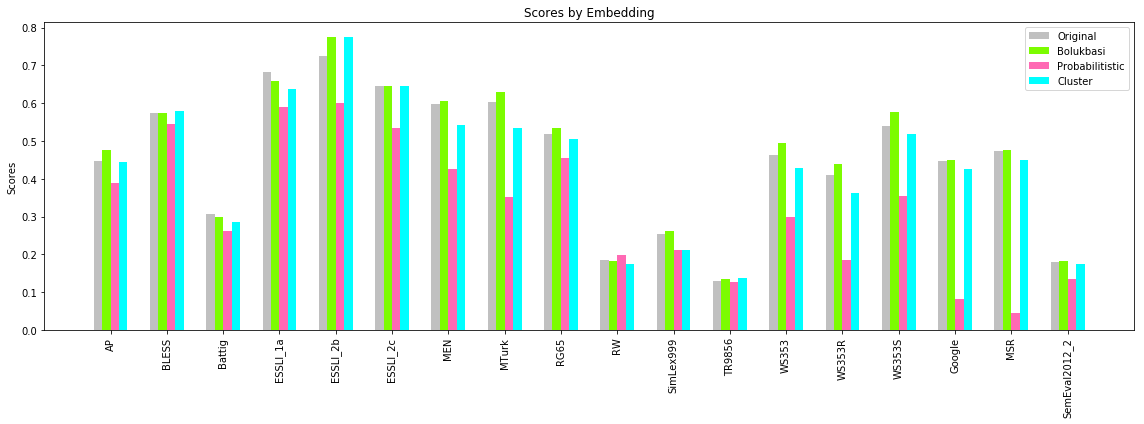

In [139]:
ind = np.arange(len([*orig_results.keys()][1:]))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(16,6))
rects1 = ax.bar(ind - width*(3/2), [*orig_results.values()][1:], width,
                label='Original',color='silver')
rects2 = ax.bar(ind - width/2, [*bolukbasi_results.values()][1:], width,
                label='Bolukbasi',color='lawngreen')
rects3 = ax.bar(ind + width/2, [*debias_prob_results.values()][1:], width,
                label='Probabilitistic',color='hotpink')
rects4 = ax.bar(ind + width*(3/2), [*debias_cluster_results.values()][1:], width,
                label='Cluster',color='cyan')

ax.set_ylabel('Scores')
ax.set_title('Scores by Embedding')
ax.set_xticks(ind)
ax.set_xticklabels([*orig_results.keys()][1:],rotation=90)
ax.legend()

fig.tight_layout()

plt.show()